## Exponential decay process 

Demonstration: 
    1. Counting data from a exponentially decaying process
    2. Exponential model
    3. Maximum likelihood with Poisson error distribution.
    4. AmoebaFitter with other error distributions.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import ExpModel
from BayesicFitting import PolynomialModel
from BayesicFitting import PoissonErrorDistribution
from BayesicFitting import AmoebaFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import printclass
import matplotlib.pyplot as plt


define some constants

In [2]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

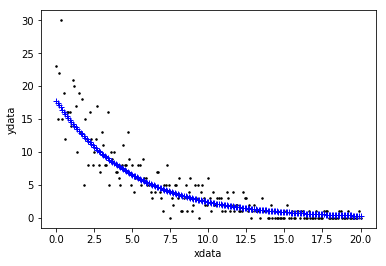

In [3]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
# plot the data along with the "truth"
plotFit( x, y, show=False )
plt.plot( x, ym, 'b+')
plt.show()

Define the model

In [4]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: AmoebaFitter with error distribution

In [5]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

# show all attributes of the fitter class 
printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
chisq           906.17475467686
errdis          poisson
fitIndex        None
fixedScale      None
imageAssistant  None
isChisq         False
iter            37
keep            None
landscape       <BayesicFitting.source.MaxLikelihoodFitter._LogL object at 0x10aaae780>
logLikelihood   -344.3232495662008
maxIter         2000
model           Exp
ndim            1
npfit           2
ntrans          72
nxdata          201
plotfreq        0
plotter         <BayesicFitting.source.IterationPlotter.IterationPlotter object at 0x10aaae630>
power           2.0
simplex         [[20.51011243 -0.21906394]  [20.51011243 -0.21906394]  [20.53488013 -0.2192916 ]  ]
sumwgt          201
tolerance       0.0001
tooLarge        100
values          [344.3232495662008  344.32333843594506  344.32327914702284  ]
verbose         1
xdata           [0.0  0.1  0.2  0.30000000000000004  0.4  0.5 

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )

Parameters : [   20.510   -0.219]
StDevs     : [    0.626    0.010]
Chisq      :   906.175
Scale      :     2.157
Evidence   :  -156.377


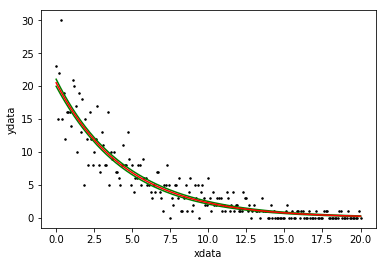

In [7]:
plotFit( x, data=y, model=mdl, fitter=fitter )

In [8]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   20.260   -0.216]   905.452        25


In [9]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   20.267   -0.216]   905.452        25


In [10]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   19.959   -0.221]   913.356        39


In [11]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   19.294   -0.217]   928.840        23


In [12]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   20.516   -0.219]   906.212        23
